
## Assignment 1 for EECS 835

### Team members:

Ina Fendel, Paul Kury, Bakhbyergyen Yerjan, and Edina Harsay

In [ ]:
# import libraries needed for this file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

## Project data description (from instruction file):

The Top500 site (https://www.top500.org/) maintains a list of top supercomputers in the world and that list is updated twice a year. The data set containing the ranking from November 2022 and can be downloaded here: https://bit.ly/45jeII3. Each row represents a supercomputer and each column represents a feature.

In [ ]:
# Import the data file. This is a stable (for now) way to load Google Drive files without
# manually uploading the file or mounting a Google Drive from logged-in Google account
# and typing the path. What a drag. And no need to convert data to Google Sheet.

url='https://drive.google.com/file/d/1GrwvqzQ-u-zYafAC1HyhcndhkcsjxEmc/view?usp=sharing' # this is just a regular old share link

file_id=url.split('/')[-2]       # this gets the document ID from the above string
dwn_url='https://drive.google.com/uc?id=' + file_id   # this creates a link usable for retrieving the file
df = pd.read_csv(dwn_url, thousands=',')  # retrieves the csv file from Google Drive and assigns to PANDAS table object

# Another way to get the data file (from GitHub)
# url = "https://raw.githubusercontent.com/PaulKury/EECS835/main/TOP500_202211.csv"

In [ ]:
# Let's look at a sample piece of the data table
df.head(3)

,Rank,Previous Rank,First Appearance,First Rank,Name,Computer,Site,Manufacturer,Country,Year,...,Accelerator/Co-Processor,Cores per Socket,Processor Generation,System Model,System Family,Interconnect Family,Interconnect,Continent,Site ID,System ID
0,1,1.0,59,1,Frontier,"HPE Cray EX235a, AMD Optimized 3rd Generation ...",DOE/SC/Oak Ridge National Laboratory,HPE,United States,2021,...,AMD Instinct MI250X,64,AMD Milan,HPE Cray EX235a,HPE Cray EX,Gigabit Ethernet,Slingshot-11,North America,48553,180047
1,2,2.0,55,1,Supercomputer Fugaku,"Supercomputer Fugaku, A64FX 48C 2.2GHz, Tofu i...",RIKEN Center for Computational Science,Fujitsu,Japan,2020,...,None,48,Fujitsu A64FX,Supercomputer Fugaku,Fujitsu Cluster,Proprietary Network,Tofu interconnect D,Asia,50831,179807
2,3,3.0,59,3,LUMI,"HPE Cray EX235a, AMD Optimized 3rd Generation ...",EuroHPC/CSC,HPE,Finland,2022,...,AMD Instinct MI250X,64,AMD Milan,HPE Cray EX235a,HPE Cray EX,Gigabit Ethernet,Slingshot-11,Europe,50908,180048


## Problem 1 - Histograms of supercomputer performance

Show a histogram of the Rmax performance (measured in TFLOP/s for running a dense linear algebra benchmark) of the 500 supercomputers. Use 50 bins in the histogram and log-scale for the y-axis. Do the same for the HPCG performance (measured in TFLOP/s for running a sparse linear algebra benchmark) for those supercomputers that have HPCG measurements.

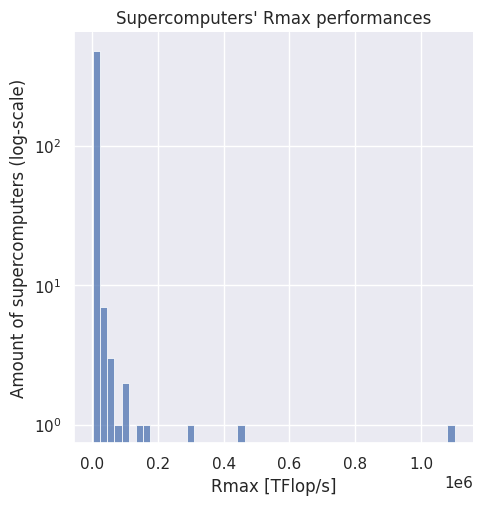

In [ ]:
# Histogram for Rmax performance

# Using seaborn distplot, which plots a histogram by default
sns.displot(df, x="Rmax [TFlop/s]", bins=50)
plt.yscale("log")  # Set the y-axis scale to log
plt.xlabel("Rmax [TFlop/s]")
plt.ylabel("Amount of supercomputers (log-scale)")
plt.title("Supercomputers' Rmax performances")
plt.show()

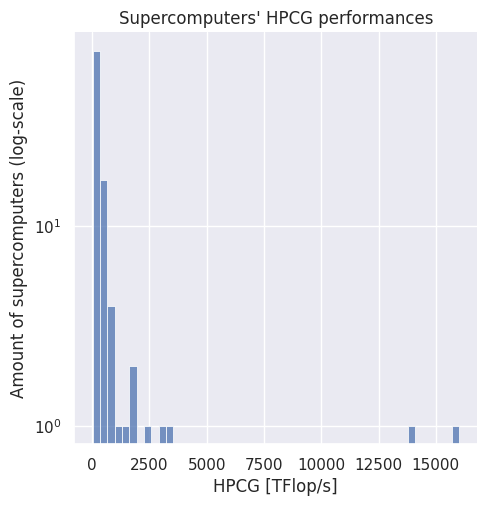

In [ ]:
# Histogram for HPCG performance

sns.displot(df, x="HPCG [TFlop/s]", bins=50)
plt.yscale("log")  # Set the y-axis scale to log
plt.xlabel("HPCG [TFlop/s]")
plt.ylabel("Amount of supercomputers (log-scale)")
plt.title("Supercomputers' HPCG performances")
plt.show()

### Problem 2 - Top Five Countries

Which five countries have the most aggregate supercomputing power (in terms of the Rmax performance)? Use a bar plot to show their aggregate supercomputing power. Do the same in terms of the HPCG performance.

In [ ]:
# Top 5 for Rmax performance
# get the sum of all Rmax values for one country
country_rmax_sums = df.groupby('Country')['Rmax [TFlop/s]'].sum()

# get the top 5 countries
top_5_country_rmax = country_rmax_sums.sort_values(ascending=False).head(5)

# make series to df to be able to use sns.barplot
top_5_country_rmax_df = top_5_country_rmax.reset_index()

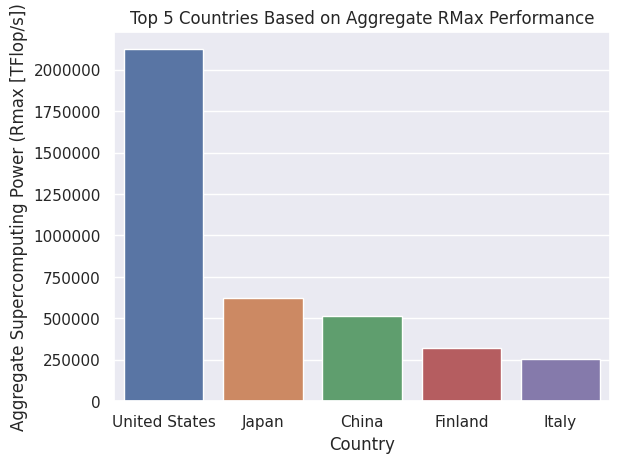

In [ ]:
# Top 5 for HPCG performance
sns.barplot(x='Country', y='Rmax [TFlop/s]', data=top_5_country_rmax_df)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel("Country")
plt.ylabel("Aggregate Supercomputing Power (Rmax [TFlop/s])")
plt.title("Top 5 Countries Based on Aggregate RMax Performance")
plt.show()

In [ ]:
# get the sum of all HPCG values for one country
country_hpcg_sums = df.groupby('Country')['HPCG [TFlop/s]'].sum()

# get the top 5 countries
top_5_country_hpcg = country_hpcg_sums.sort_values(ascending=False).head(5)

# make series to df to be able to use sns.barplot
top_5_country_hpcg_df = top_5_country_hpcg.reset_index()

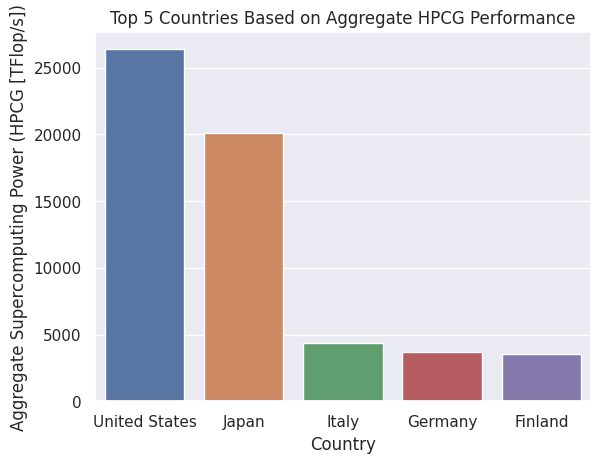

In [ ]:
sns.barplot(x='Country', y='HPCG [TFlop/s]', data=top_5_country_hpcg_df)
plt.xlabel("Country")
plt.ylabel('Aggregate Supercomputing Power (HPCG [TFlop/s])')
plt.title('Top 5 Countries Based on Aggregate HPCG Performance')
plt.show()

### Problem 3 - Number of supercomputers since 2014

How many supercomputers were introduced worldwide each year since 2014? Use a line plot to show the trend. Do the same for the supercomputers introduced in the United States alone since 2014. Make sure the two lines are plotted in the same figure.

In [ ]:
# get the amount of new supercomputers for each year by creating a dataframe with columns Year and Count
amount_computers_per_year = df.groupby('Year').size().reset_index(name='Count')

# filter to only get counts for year 2014 and newer
amount_computers_per_year_since_2014 = amount_computers_per_year[amount_computers_per_year['Year'] >= 2014]

In [ ]:
# filter dataframe to only get USA
df_usa = df[df['Country'] == 'United States']
amount_computers_per_year_us = df_usa.groupby('Year').size().reset_index(name='Count')
amount_computers_per_year_since_2014_us = amount_computers_per_year_us[amount_computers_per_year_us['Year'] >= 2014]

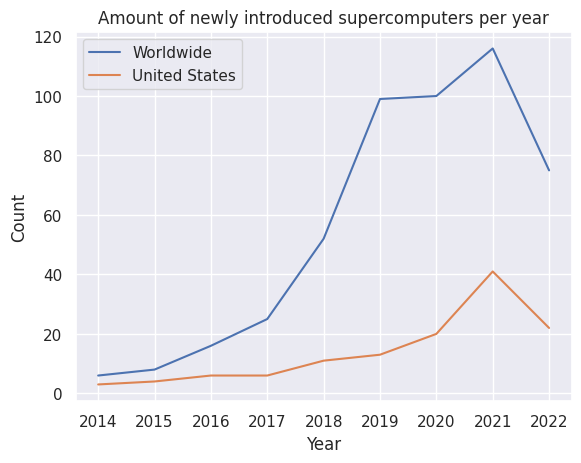

In [ ]:
plt.plot(amount_computers_per_year_since_2014['Year'], amount_computers_per_year_since_2014['Count'], label='Worldwide')
plt.plot(amount_computers_per_year_since_2014['Year'], amount_computers_per_year_since_2014_us['Count'], label='United States')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Amount of newly introduced supercomputers per year')
plt.legend()
plt.show()

### Problem 4 - Top 10 Manufacturers

Use a pie chart to show the shares of the top 10 manufacturers (e.g., HPE, IBM) in terms of the number of systems. Include the total share of all remaining manufacturers as “others”. If a supercomputer has more than one manufacturer (e.g., IBM/NVIDIA/Mellanox), consider it as “others” as well. Indicate clearly the manufacturers and their percentage of share. Do the same in terms of the aggregate Rmax performance.

In [ ]:
amount_computers_per_manufacturer = df.groupby('Manufacturer').size().reset_index(name='Count')
amount_computers_per_manufacturer_sorted = amount_computers_per_manufacturer.sort_values(by = 'Count', ascending=False)

print(amount_computers_per_manufacturer_sorted.head(10))

   Manufacturer  Count
16       Lenovo    160
10          HPE    101
14       Inspur     50
3          Atos     43
32        Sugon     34
6      DELL EMC     18
26       Nvidia     14
21          NEC     12
8       Fujitsu     10
19      MEGWARE      6


In [ ]:
# A quick look into the sorted df shows that none of the supercomputers with more than one manufacturer are in the top 10
# We thus can simply add all supercomputers together as "others" that are not from the top 10 manufacturers
# Get top 10 first
amount_computers_per_manufacturer_top_10 = amount_computers_per_manufacturer_sorted.head(10)

# Count all supercomputers that are not in the top 10 as others
sum_others = amount_computers_per_manufacturer_sorted[~amount_computers_per_manufacturer_sorted['Manufacturer'].isin(amount_computers_per_manufacturer_top_10['Manufacturer'])]['Count'].sum()

# Create df with other manufacturers
amount_computers_per_manufacturer_others = pd.DataFrame({'Manufacturer': ['Others'], 'Count': [sum_others]})

# Combine dfs for top 10 and others
amount_computers_per_manufacturer_top_10_and_others = pd.concat([amount_computers_per_manufacturer_top_10, amount_computers_per_manufacturer_others]).sort_values('Count', ascending = False)

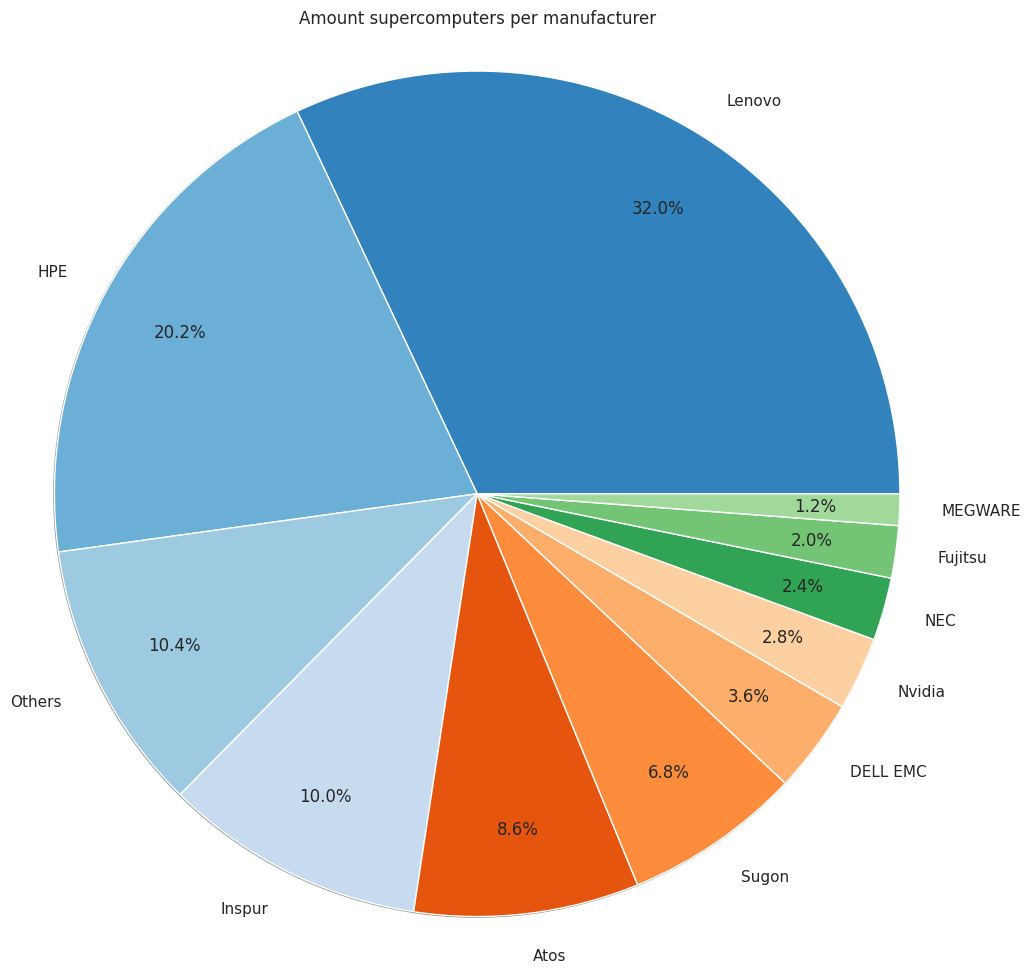

In [ ]:
plt.figure(figsize=(12, 12))
plt.pie(amount_computers_per_manufacturer_top_10_and_others['Count'],labels=amount_computers_per_manufacturer_top_10_and_others['Manufacturer'],
        shadow=True,
        radius=20,
        autopct='%.1f%%',
        pctdistance=0.8,
        counterclock=True,
        startangle=0, #set startangle to 0 to avoid any overlapping of labels, percentages
        colors = sns.color_palette("tab20c", len(amount_computers_per_manufacturer_top_10_and_others)))
plt.axis("equal")

# Move title a bit upwards so it doesn't overlap with labels
plt.title("Amount supercomputers per manufacturer")
plt.show()

In [ ]:
sum_performance_per_manufacturer = df.groupby('Manufacturer')['Rmax [TFlop/s]'].sum().reset_index()
sum_performance_per_manufacturer_sorted = sum_performance_per_manufacturer.sort_values(by = 'Rmax [TFlop/s]', ascending=False)

print(sum_performance_per_manufacturer_sorted.head(10))

               Manufacturer  Rmax [TFlop/s]
10                      HPE      2166384.66
8                   Fujitsu       529685.52
16                   Lenovo       474001.67
3                      Atos       448917.99
12                      IBM       201915.00
26                   Nvidia       147754.00
13  IBM / NVIDIA / Mellanox       112840.00
6                  DELL EMC       112664.12
14                   Inspur       107308.41
20          Microsoft Azure        96410.00


In [ ]:
# A quick look into the sorted df shows that one of the supercomputers with more than one manufacture is in the top 10
# This should not be in the top 10 so let's filter combined manufactureres out (by filtering "/" out)
sum_performance_per_single_manufacturer_sorted = sum_performance_per_manufacturer_sorted[~sum_performance_per_manufacturer_sorted['Manufacturer'].str.contains('/')]

# get top 10
sum_performance_per_manufacturer_top_10 = sum_performance_per_single_manufacturer_sorted.head(10)

# Sum of all performances that are not in the top 10 as others
sum_performance_others = sum_performance_per_manufacturer_sorted[~sum_performance_per_manufacturer_sorted['Manufacturer'].isin(sum_performance_per_manufacturer_top_10['Manufacturer'])]['Rmax [TFlop/s]'].sum()

# Create df with other manufacturers
sum_performance_per_manufacturer_others = pd.DataFrame({'Manufacturer': ['Others'], 'Rmax [TFlop/s]': [sum_performance_others]})

# Combine dfs for top 10 and others
sum_performance_per_manufacturer_top_10_and_others = pd.concat([sum_performance_per_manufacturer_top_10, sum_performance_per_manufacturer_others]).sort_values('Rmax [TFlop/s]', ascending = False)

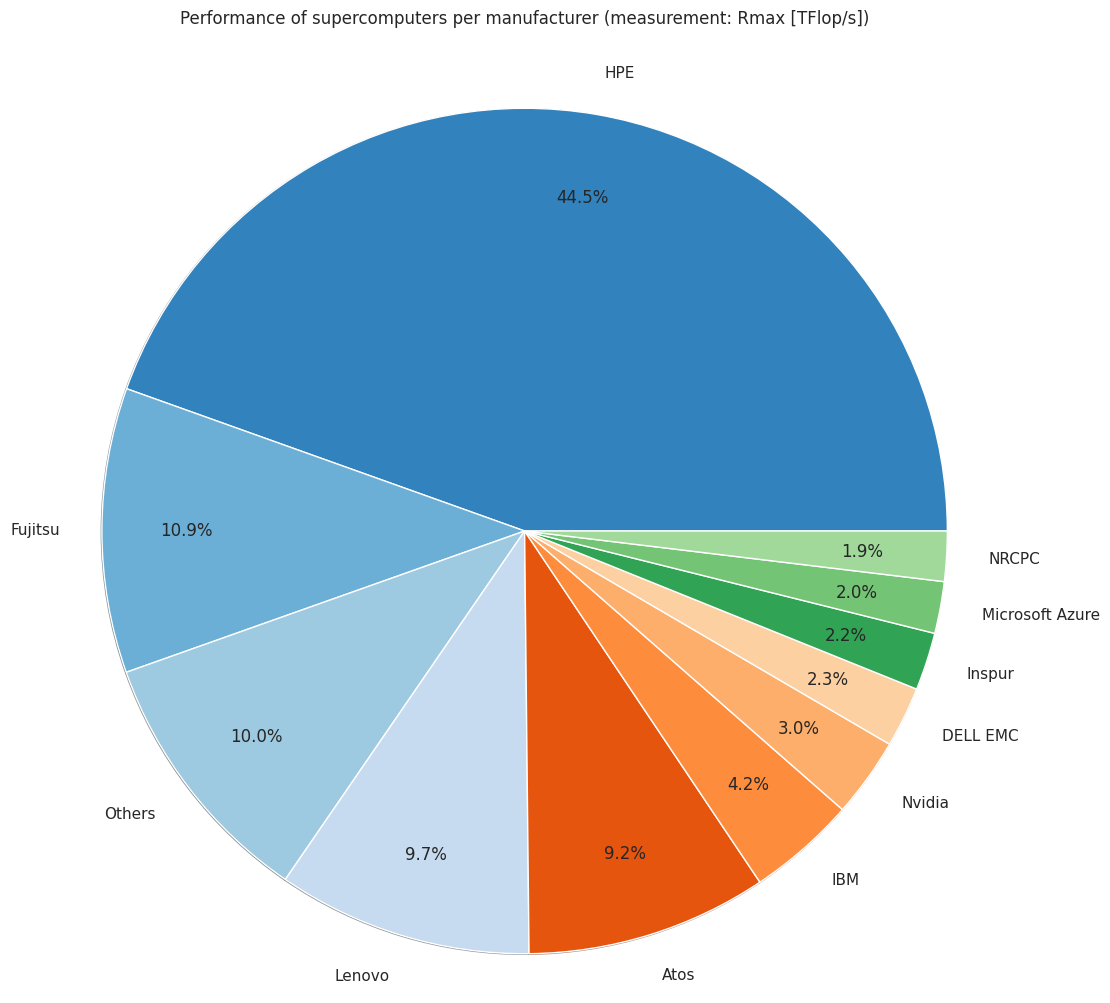

In [ ]:
plt.figure(figsize=(12, 12))
plt.pie(sum_performance_per_manufacturer_top_10_and_others['Rmax [TFlop/s]'],labels=sum_performance_per_manufacturer_top_10_and_others['Manufacturer'],
        shadow=True,
        radius=20,
        autopct='%.1f%%',
        pctdistance=0.8,
        counterclock=True,
        startangle=0, #set startangle to 0 to avoid any overlapping of labels, percentages
        colors = sns.color_palette("tab20c", len(amount_computers_per_manufacturer_top_10_and_others)))
plt.axis("equal")

# Move title a bit upwards so it doesn't overlap with labels
plt.title("Performance of supercomputers per manufacturer (measurement: Rmax [TFlop/s])", y = 1.04)
plt.show()

### Problem 5 - Rmax versus Power

For those supercomputers that have power measurements, draw a scatter plot to show the relationship between the Rmax performance and the power (in kW). Use log-scale for both x-axis and y-axis. Draw another scatter plot to show the relationship between the Rmax performance and the total number of cores (also with log-scale for both x-axis and y-axis.)

In [ ]:
# drop rows from df without input for the column Power (kW)
df_with_power = df.dropna(subset=['Power (kW)'])

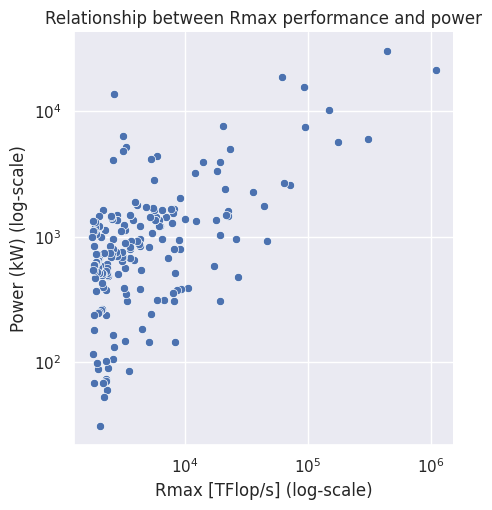

In [ ]:
# scatterplot is the default type of relplot
sns.relplot(data=df_with_power, x="Rmax [TFlop/s]", y="Power (kW)")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Rmax [TFlop/s] (log-scale)')
plt.ylabel('Power (kW) (log-scale)')
plt.title('Relationship between Rmax performance and power')
plt.show()

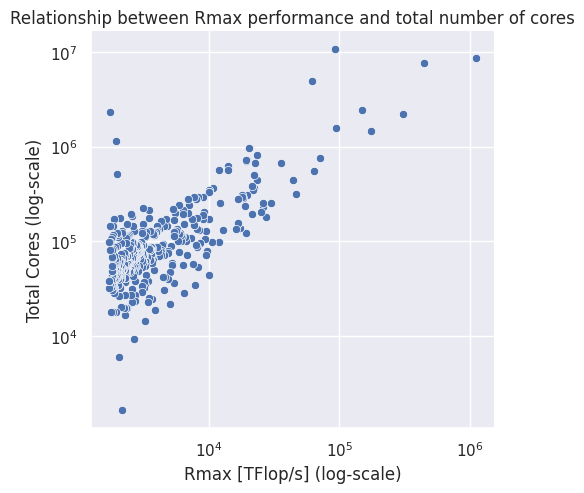

In [ ]:
# scatterplot is the default type of relplot
sns.relplot(data=df, x="Rmax [TFlop/s]", y="Total Cores")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Rmax [TFlop/s] (log-scale)')
plt.ylabel('Total Cores (log-scale)')
plt.title('Relationship between Rmax performance and total number of cores')
plt.show()